In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import sys
import time
import sklearn
import tensorflow as tf
from tensorflow import keras
import pandas as pd

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd,  sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.1.0
sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0)
matplotlib 3.1.3
numpy 1.18.1
pandas 1.0.1
sklearn 0.22.2
tensorflow 2.1.0
tensorflow_core.python.keras.api._v2.keras 2.2.4-tf


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
# datasets 存储在home/.keras/datasets/
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [10]:
# 对数据进行标准化 (x - u) /std
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(x_valid.astype(np.float32).reshape(-1,1)).reshape(-1, 28,28)
x_test_scaled = scaler.transform(x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28, 28)


In [7]:
# tf.keras.models.Sequential()

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1

In [11]:
# callbacks(TensorBoard, EarlyStopping, ModelCheckpoint)
# tensorboard --logdir callbacks
logdir = './dnn-callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir, 'fashion_mnist_model.h5')
callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file, save_best_only = True),
    keras.callbacks.EarlyStopping(patience = 5, min_delta = 1e-3),
]

history = model.fit(x_train_scaled, y_train, epochs = 10, validation_data = [x_valid_scaled, y_valid], callbacks = callbacks)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 5s 98us/sample - loss: 2.0501 - accuracy: 0.2394 - val_loss: 1.1816 - val_accuracy: 0.5360
Epoch 2/10
55000/55000 [==============================] - 5s 88us/sample - loss: 0.8161 - accuracy: 0.6993 - val_loss: 0.5765 - val_accuracy: 0.7908
Epoch 3/10
55000/55000 [==============================] - 5s 88us/sample - loss: 0.5795 - accuracy: 0.7878 - val_loss: 0.4931 - val_accuracy: 0.8186
Epoch 4/10
55000/55000 [==============================] - 5s 92us/sample - loss: 0.4891 - accuracy: 0.8283 - val_loss: 0.4740 - val_accuracy: 0.8454
Epoch 5/10
55000/55000 [==============================] - 5s 90us/sample - loss: 0.4343 - accuracy: 0.8523 - val_loss: 0.4013 - val_accuracy: 0.8640
Epoch 6/10
55000/55000 [==============================] - 5s 85us/sample - loss: 0.3995 - accuracy: 0.8639 - val_loss: 0.4444 - val_accuracy: 0.8536
Epoch 7/10
55000/55000 [==============================] -

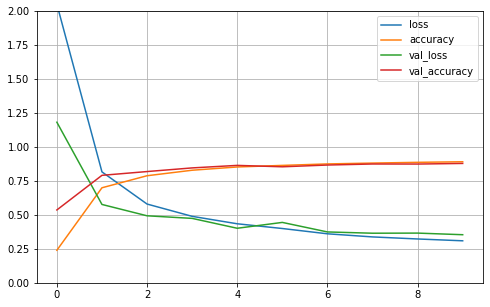

In [14]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize = (8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 2)
    plt.show()
    
plot_learning_curves(history)
# 学习曲线前期平缓的原因：
# 1.参数众多，训练不充分
# 2. 梯度消失->链式法则-> 复合函数f(g(x))对其求导的时候值很小

In [15]:
model.evaluate(x_test_scaled, y_test)

10000/10000 [==============================] - 0s 34us/sample - loss: 0.3874 - accuracy: 0.8656


[0.387422106552124, 0.8656]